In [1]:
import pandas as pd

import xgboost as xgb

import statsmodels.api as sm
import statsmodels.stats.api as sms

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from models.wrappers import ResultWrapper

from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = 671993

In [2]:
df = pd.read_csv('../data/forbes_2000_iqr_range_feature_engineering.csv')

In [3]:
df.test.value_counts().sort_index()

False    14224
True      1272
Name: test, dtype: int64

In [4]:
def train_test_split_by_year(x_df: pd.DataFrame, y_df: pd.DataFrame):
    X_train = x_df[x_df.test == False].drop('test', axis=1).to_numpy()
    X_test = x_df[x_df.test].drop('test', axis=1).to_numpy()
    y_train = y_df[x_df.test == False].drop('test', axis=1).to_numpy().flatten()
    y_test = y_df[x_df.test].drop('test', axis=1).to_numpy().flatten()

    return X_train, X_test, y_train, y_test

In [5]:
# XGBOOST PRO MODEL

x=df.drop(['company','market_value','year','industry','sector','country','continent'], axis=1)
y=df.loc[:,['market_value','test']]

X_train, X_test, y_train, y_test = train_test_split_by_year(x, y)

In [6]:
# PARAMETERS
max_depth = 15
learning_rate = 0.01
n_estimators = 1000
colsample_bytree = 0.5
colsample_bylevel = 0.8999999999999999
reg_lambda = 50
reg_alpha = 0

In [7]:

# Instantiate an XGBoost object with hyperparameters
xgb_reg = xgb.XGBRegressor(
    max_depth=max_depth,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    n_jobs=2,
    objective='reg:squarederror',
    booster='gbtree',
    random_state=RANDOM_SEED,
    colsample_bytree=colsample_bytree,
    colsample_bylevel=colsample_bylevel,
    reg_lambda=reg_lambda,
    reg_alpha=reg_alpha
)

# Train the model with train data sets
xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test) # Predictions

In [8]:
xg_wrapper = ResultWrapper(
    y_test=y_test,
    y_pred=y_pred
)

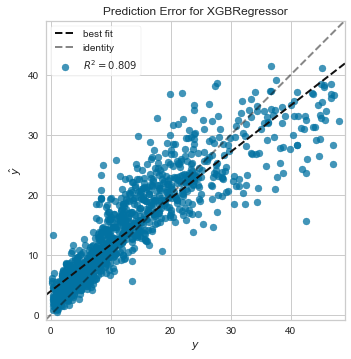

PredictionError(ax=<AxesSubplot:title={'center':'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>,
                estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                       colsample_bylevel=0.8999999999999999,
                                       colsample_bynode=1, colsample_bytree=0.5,
                                       gamma=0, gpu_id=-1,
                                       importance_type='gain',
                                       interaction_constraints='',
                                       learning_rate=0.01, max_delta_step=0,
                                       max_depth=15, min_child_weight=1,
                                       missing=nan, monotone_constraints='()',
                                       n_estimators=1000, n_jobs=2,
                                       num_parallel_tree=1, random_state=671993,
                                       reg_alpha=0, reg_lambda=50,
             

In [9]:
# Making the Prediction Error Plot
prediction_error(xgb_reg, X_train, y_train, X_test, y_test)

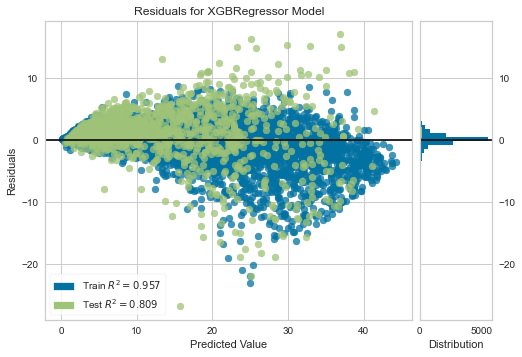

AttributeError: 'XGBRegressor' object has no attribute 'line_color'

AttributeError: 'XGBRegressor' object has no attribute 'line_color'

In [10]:
# Making the Residuals Plot
residuals_plot(xgb_reg, X_train, y_train, X_test, y_test)

In [11]:
xg_results = pd.DataFrame({'actual': y_test, 'prediction': y_pred})
xg_results['residuals'] = xg_wrapper.residuals()
xg_results

,actual,prediction,residuals
0,35.6,33.972145,1.627855
1,45.5,38.359371,7.140629
2,45.2,35.395866,9.804134
3,45.3,41.154663,4.145337
4,37.5,39.202045,-1.702045
...,...,...,...
1267,5.0,4.150178,0.849822
1268,3.3,4.023926,-0.723926
1269,6.9,10.346750,-3.446750
1270,8.3,6.905300,1.394700


No handles with labels found to put in legend.


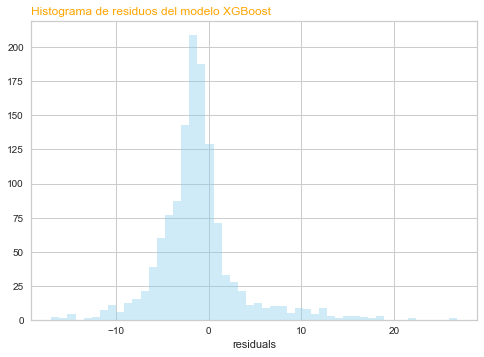

In [18]:
sns.distplot(
    a=xg_results.loc[:, "residuals"],
    hist=True,
    kde=False,
    rug=False,
    color='skyblue'
)
plt.title(
    f'Histograma de residuos del modelo XGBoost',
    loc='left',
    fontsize=12,
    fontweight=0,
    color='orange'
)
plt.legend()
plt.show()

In [12]:
# Durbin-Watson test to test if errors are independent

sms.stattools.durbin_watson(xg_wrapper.residuals())

1.8438544054749557

In [13]:
# Given the statistical value of 1.943,
# the test provides evidence that there is no serial correlation present
# meaning the residual error terms are uncorrelated and are independent

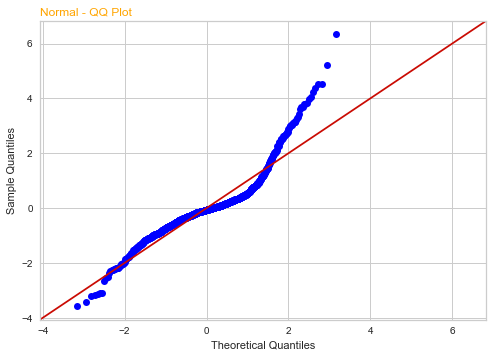

In [19]:
sm.qqplot(xg_wrapper.residuals(), stats.norm, fit=True, line="45")
plt.show()

In [15]:
xg_wrapper.print()

R2 Square: 0.8085299790353689
Mean Absolute Error: 3.2209895351330435
Mean Squared Error: 20.971923077484263
Root Mean Squared Error: 4.579511226919775


In [16]:
# Initial Params
# max_depth=3
# learning_rate=0.05

# R2 Square: 0.6111618629019608
# Mean Absolute Error: 4.806121030630556
# Mean Squared Error: 42.589871039491435
# Root Mean Squared Error: 6.526091559232941


In [17]:
# Optimized Params

# R2 Square: 0.8085299790353689
# Mean Absolute Error: 3.2209895351330435
# Mean Squared Error: 20.971923077484263
# Root Mean Squared Error: 4.579511226919775
